# Week 2 Practical: Testing Statistical Assumptions (4 hours)

## Datasets Used

- **Gapminder dataset**  
    Life expectancy, GDP, population

- **Iris dataset**  
    Sepal & petal dimensions  
    Built-in in R & Python:  
    `seaborn.load_dataset("iris")`

- **Diamonds dataset**  
    Diamond prices  
    Built-in in seaborn:  
    `sns.load_dataset("diamonds")`

- **House Prices dataset**  
    Housing prices & features  
    [Kaggle link](https://www.kaggle.com/datasets/shree1992/housedata)

# Part 1: Measuring Skewness
By Hand (Diamonds dataset, Price variable)

Formula (Pearson’s 2nd Coefficient of Skewness):

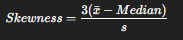

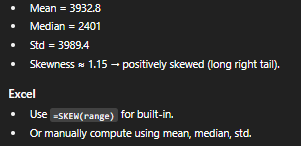



In [1]:
import seaborn as sns, numpy as np
from scipy.stats import skew
diamonds = sns.load_dataset("diamonds")
prices = diamonds["price"]

# Pearson’s second coefficient
pearson_skew = (3 * (prices.mean() - prices.median())) / prices.std()

# Built-in
scipy_skew = skew(prices)

print("Pearson skew:", pearson_skew)
print("Scipy skew:", scipy_skew)


Pearson skew: 1.1518908587086387
Scipy skew: 1.6183502776053016


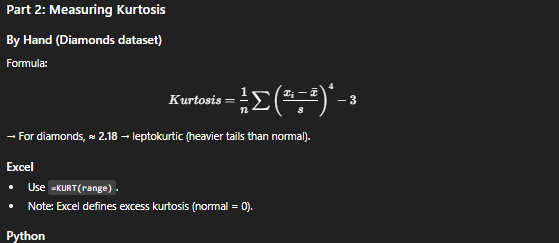

In [2]:
from scipy.stats import kurtosis

def manual_kurtosis(x):
    n = len(x)
    mean = np.mean(x)
    std = np.std(x)
    return (1/n) * sum(((x - mean)/std)**4) - 3

print("Manual:", manual_kurtosis(prices))
print("Built-in:", kurtosis(prices))


Manual: 2.17738266905703
Built-in: 2.177382669056634


## Part 3: Visual Checks for Normality

### Histogram & KDE of Diamond Prices

- Visualize the distribution of diamond prices.
- Overlay lines for **mean**, **median**, and **mode** to compare central tendencies.
- Use histogram and kernel density estimate (KDE) for a comprehensive view.

Step-by-step instructions for creating a histogram with reference lines in **Excel**:

---

### 1. Insert a Histogram

1. Select your **price** data column.
2. Go to the **Insert** tab.
3. Click **Insert Statistic Chart** → **Histogram**.

---

### 2. Calculate Mean, Median, and Mode

In empty cells, use the following formulas (replace `range` with your data range):

- **Mean:** `=AVERAGE(range)`
- **Median:** `=MEDIAN(range)`
- **Mode:** `=MODE.SNGL(range)`

---

### 3. Add Reference Lines

1. Click on the histogram chart.
2. Go to **Chart Design** → **Add Chart Element** → **Lines** → **Add Data Series**.
3. Right-click the chart, choose **Select Data** → **Add**.
4. For each statistic (mean, median, mode):
    - Add a new series with X values as the statistic (e.g., mean) repeated for min and max Y values.
    - Format the new series as a line (right-click the series → **Change Chart Type** → **Line**).
    - Adjust color/style for clarity.

---

### 4. Label the Lines

1. Click each line, right-click, and choose **Add Data Label**.
2. Edit the label to say "Mean", "Median", or "Mode".

---

**Tip:**  
For a quick visual, you can also draw vertical lines manually using the **Shapes** tool and position them at the calculated values.

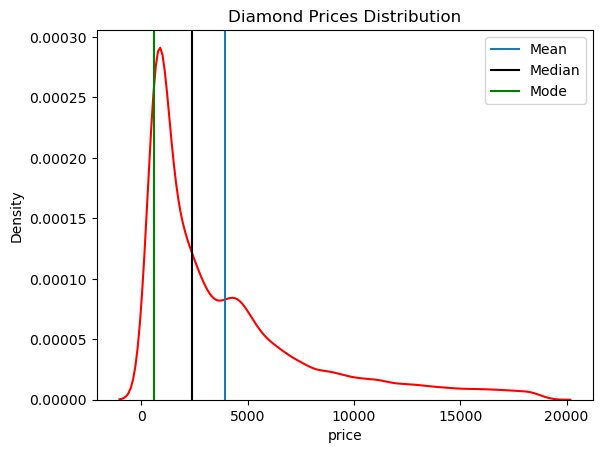

In [3]:
import matplotlib.pyplot as plt
sns.kdeplot(prices, color="red")
plt.axvline(prices.mean(), label="Mean")
plt.axvline(prices.median(), color="black", label="Median")
plt.axvline(prices.mode().squeeze(), color="green", label="Mode")
plt.legend()
plt.title("Diamond Prices Distribution")
plt.show()


Part 4: Q-Q Plots and Boxplots

Python (log-normal sample)

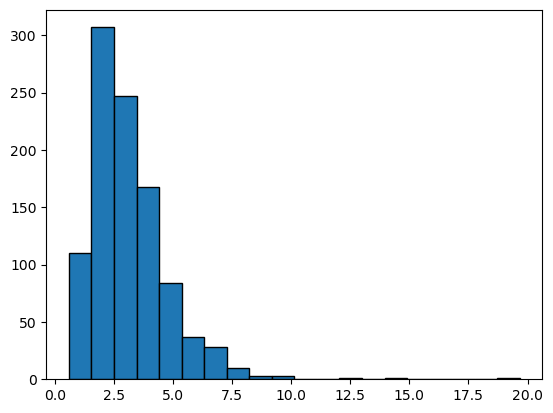

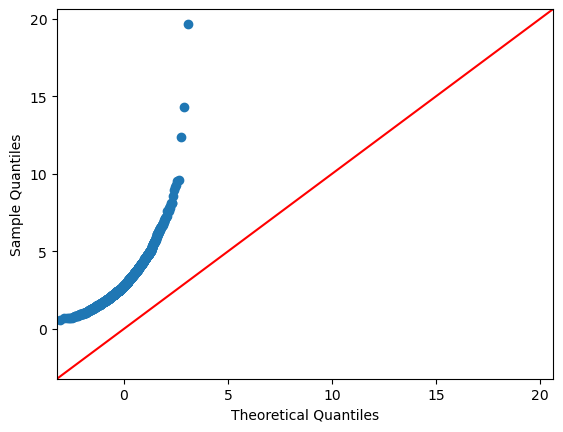

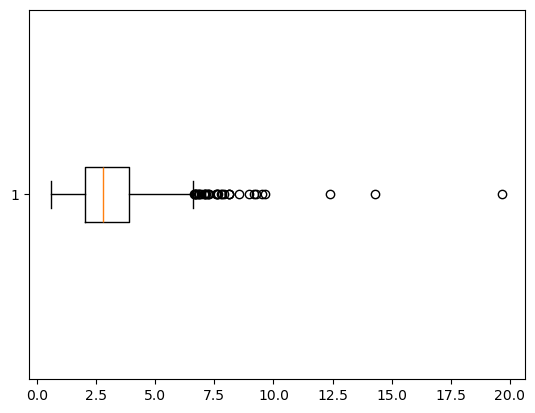

In [4]:
import statsmodels.api as sm
from scipy.stats import lognorm

np.random.seed(1)
data = lognorm.rvs(s=0.5, scale=np.exp(1), size=1000)

# Histogram
plt.hist(data, bins=20, edgecolor="black")
plt.show()

# Q-Q plot
sm.qqplot(data, line='45')
plt.show()

# Boxplot
plt.boxplot(data, vert=False)
plt.show()


Not replicable in excel

## Part 5: Statistical Tests for Normality

Shapiro-Wilk

In [6]:
import scipy


scipy.stats.shapiro(data)

ShapiroResult(statistic=0.8573321719184391, pvalue=3.880399896267678e-29)

The **Shapiro-Wilk test** checks if your data is normally distributed.

- **Null hypothesis (H₀):** Data comes from a normal distribution.
- **Interpretation:**  
    - **p-value ≪ 0.05:** Strong evidence against normality (reject H₀).
    - **Conclusion:**  
        Your data is **not** normally distributed (very small p-value).  
        The distribution is significantly different from normal.

Kolmogorov-Smirnov

In [8]:
scipy.stats.kstest(data, 'norm')

KstestResult(statistic=0.84125708308077, pvalue=0.0, statistic_location=1.2773298091955965, statistic_sign=-1)

**Kolmogorov-Smirnov Test Interpretation**

- The Kolmogorov-Smirnov (K-S) test compares your data to a normal distribution.
- **Null hypothesis (H₀):** The data comes from a normal distribution.
- **Test result:**  
  `KstestResult(statistic=0.84125708308077, pvalue=0.0, ...)`
- **p-value = 0.0:** This is much less than 0.05, so we reject the null hypothesis.
- **Conclusion:**  
  There is strong evidence that the data **does not follow a normal distribution**.

## Part 6: Linearity

**Dataset:** *Iris* (Sepal vs Petal length)

---

### Visualizing Linearity in Excel

1. **Create a Scatterplot**
    - Select your Sepal and Petal length columns.
    - Go to the **Insert** tab.
    - Click **Insert Scatter (X, Y) or Bubble Chart** → **Scatter**.

2. **Add a Trendline**
    - Click on any data point in the scatterplot.
    - Right-click and choose **Add Trendline**.
    - Choose **Linear**.
    - (Optional) Check **Display Equation on chart** and **Display R-squared value on chart** for more insight.

---

**Interpretation:**  
A linear trendline that fits the data well (high R²) suggests a linear relationship between Sepal and Petal length.

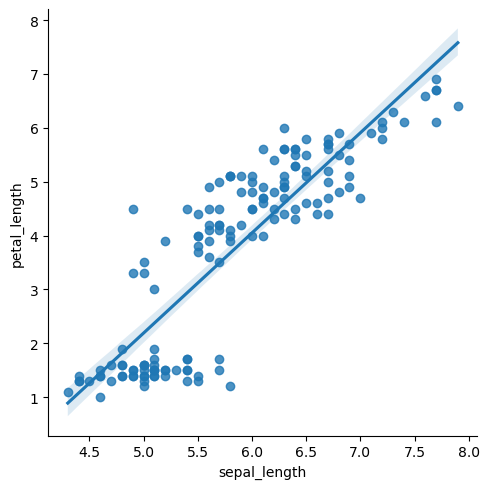

In [9]:
sns.lmplot(x="sepal_length", y="petal_length", data=sns.load_dataset("iris"))


# Part 7: Homogeneity of Variance

**Dataset:** House Prices by City

---

### What is Homogeneity of Variance?

Homogeneity of variance (also called *homoscedasticity*) means that different groups have similar variances. This is an important assumption for many statistical tests (e.g., ANOVA, t-test).

---

### Example: House Prices by City

Suppose you have house price data grouped by city. To check if the variances are similar across neighborhoods:

- **In Excel:**  
    Use `=VAR.P(range)` for each group (city) to calculate the population variance.
- **Compare** the variances. Large differences may indicate a violation of the assumption.

---

### Why It Matters

- If variances are not equal, some statistical tests may give misleading results.
- There are formal tests for this assumption (e.g., Levene’s test, Bartlett’s test) in Python and R.

---

**Tip:**  
Always visualize your data (e.g., boxplots) and check group variances before running tests that assume homogeneity.

df = sns.load_dataset("iris")

In [12]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [14]:
df.city.unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [16]:
from scipy.stats import levene

levene(
    df[df['city'] == "Shoreline"]['price'],
    df[df['city'] == "Seattle"]['price']
)


LeveneResult(statistic=8.260167651581526, pvalue=0.004102992225267248)

**Levene’s Test for Homogeneity of Variance**

- **Purpose:** Levene’s test checks if two or more groups have equal variances (homogeneity of variance), which is an assumption for many statistical tests like ANOVA and t-tests.
- **Null hypothesis (H₀):** All groups have equal variances.
- **Test result:**  
  `LeveneResult(statistic=8.26, pvalue=0.0041)`
- **p-value = 0.0041:** This is less than 0.05, so we **reject the null hypothesis**.
- **Conclusion:**  
  There is significant evidence that the variances of house prices in "Shoreline" and "Seattle" are **not equal**.  
  The assumption of homogeneity of variance is **violated** for these groups.

# Part 8: Heteroscedasticity Tests (Regression Residuals)

Python (Breusch-Pagan):

In [17]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
model = sm.OLS(df["price"], sm.add_constant(df["sqft_living"])).fit()
het_breuschpagan(model.resid, model.model.exog)

(0.006328238682140608,
 0.9365949824576947,
 0.006325495976123509,
 0.9366121561776651)

**Breusch-Pagan Test for Heteroscedasticity**

- **Purpose:** Tests whether the variance of the residuals from a regression is constant (homoscedasticity).
- **Null hypothesis (H₀):** Residuals have constant variance (homoscedastic).
- **Test result:**  
  `(LM stat=0.0063, p-value=0.9366, F stat=0.0063, F p-value=0.9366)`
- **p-value = 0.9366:** This is much greater than 0.05, so we **fail to reject the null hypothesis**.
- **Conclusion:**  
  There is **no evidence of heteroscedasticity**. The residuals appear to have constant variance.

Python (White Test):

In [ ]:
from statsmodels.stats.diagnostic import het_white
het_white(model.resid, model.model.exog)


(2.1207135350986617,
 0.3463322281860148,
 1.0601539876814905,
 0.34648714121140334)

**White Test for Heteroscedasticity**

- **Purpose:** Another test for constant variance of residuals, robust to non-linearity.
- **Null hypothesis (H₀):** Residuals have constant variance (homoscedastic).
- **Test result:**  
  `(LM stat=2.12, p-value=0.3463, F stat=1.06, F p-value=0.3465)`
- **p-value = 0.3463:** This is greater than 0.05, so we **fail to reject the null hypothesis**.
- **Conclusion:**  
  There is **no evidence of heteroscedasticity**. The residuals appear to have constant variance.